
#  Hyperbolic equations


## Introduction

Just as elliptic and parabolic, hyperbolic equations are a subclass of second-order partial differential equations. As mentioned earlier, all second-order partial differential equations can be written in the form

$$A \frac{\partial^2 f}{\partial x^2} + B \frac{\partial^2 f}{\partial x \partial y} + C \frac{\partial^2 f}{\partial y^2} + D \frac{\partial f}{\partial x} +  E \frac{\partial f}{\partial y} + F f + G = 0$$

An <i> hyperbolic</i> second-order partial differential equation is an equation on the form above where $B^2-AC > 0$.

In science and engineering, hyperbolic equations are used to model a variety of physical phenomena. One example is the wave equation,
$$\nabla^2 u -\frac{1}{c^2}\frac{\partial^2 u}{\partial t^2} = 0$$
where $u(\vec{x},t)$ is the wave function, and $c$ is the wave speed. This equation can describe radio waves, light, sound, and seismic waves. Other examples are the kinematic wave equation and the shallow water equation in fluid mechanics. 
We see that for the wave  equation we have $A= 1$ and $C=-1/c^2$, while all the other pre-factors are zero, thus $B^2 - AC = 0 +1/c^2 = 1/c^2 > 0$, as required to be a hyperbolic equation.

The propagation speed in the wave equation is finite, which is in contrast to the parabolic equation, where the diffusion process has an infinite speed: You will immediately see the effect of a boundary change in the whole domain when you solve the parabolic equation.

In the following, we will investigate the numerical solution of the wave equation.

## The wave equation

![string.png](string.png)

The wave equation can describe waves in fluids or solid materials like rocks or metal. To simplify, we will consider the simplified situation with a one-dimensional wave, describing, e.g., compression and stretching of a string.

The wave equation derives from Newton's law and Hook's law, and it can be shown to yield the following equations
\begin{eqnarray}
  \rho \frac{\partial^2 u(x,t)}{\partial t^2} &=& \frac{\partial \sigma(x,t)}{\partial x} + f(x,t) \\
  \sigma(x,t) &=& \kappa \frac{\partial u(x,t)}{\partial x}
\end{eqnarray}
Here $u(x,t)$ is the displacement (from equilibrium) of the string and $\sigma$ is the stress (force per length unit) in the string. The displacement describes motion along the string, i.e., stretching and compression. The $\kappa$ is the stiffness and $\rho$ is the density of the string, and $f(x,t)$ is a driving force (source).

Differentiating the second equation above  with respect to $x$ and inserting into the first equation, we get
\begin{eqnarray}
  \frac{\rho}{\kappa} \frac{\partial^2 u}{\partial t^2} = \frac{\partial^2 u}{\partial x^2} + \frac{f}{\kappa}.
\end{eqnarray}
Here we assume that $\kappa$ and $\rho$ are constants. The wave velocity is given by $c^{-2} = \rho/\kappa$, so we have
\begin{eqnarray}
  c^{-2}(x) \frac{\partial^2 u(x,t)}{\partial t^2} = \frac{\partial^2 u(x,t)}{\partial x^2} + s(x,t).
\end{eqnarray}
where $s(x,t) = f(x,t)/\kappa$. We see that this is equivalent to the wave equation we saw before. We now want to solve this equation numerically.

### Numerical scheme

We create a grid out of the $x$ and $t$ coordinates as follows
\begin{eqnarray}
  x_i & = & i\Delta x = i h, \, i=1,\cdots,n\\
  t_j & = & j\Delta t = j k, \, j=1,\cdots,m.
\end{eqnarray}
Here, $i$ is the index for the spatial coordinate, while $j$ is the index for the time coordinate. We want to compute an approximate solution, $u_{i,j}$, to the true solution $u(x_i,t_j)$ for all gridpoints in the grid.

![grid.png](grid.png)

For this, we will again return to the finite differences for approximating the differentials.

The second-order derivatives are approximated with a central difference
\begin{eqnarray}
\frac{u_{i,j+1} -2 u_{i,j} + u_{i,j-1}}{k^2} =
c^2_i\frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2} + s_{i,j}
\end{eqnarray}
This is equal to
\begin{eqnarray}
u_{i,j+1} -2 u_{i,j} + u_{i,j-1} =
\frac{k^2c^2_i}{h^2}(u_{i+1,j} - 2u_{i,j} + u_{i-1,j}) + s_{i,j}k^2
\end{eqnarray}
We introduce $r^2_i = \left(\frac{kc_i}{h}\right)^2$ to get
\begin{eqnarray}
u_{i,j+1} -2 u_{i,j} + u_{i,j-1} = r^2_i(u_{i+1,j} - 2u_{i,j} + u_{i-1,j}) + s_{i,j} k^2
\end{eqnarray}
which is solved by
\begin{eqnarray}
u_{i,j+1} = 2 u_{i,j} - u_{i,j-1} +r^2_i(u_{i+1,j} - 2u_{i,j} + u_{i-1,j}) + s_{i,j} k^2
\end{eqnarray}

Since $j$ is the index for the time coordinate, we see that the above equation yields the displacement at time $j+1$ calculated from the displacement at the previous times $j$ and $j-1$. We also note that with this numerical scheme, we need the initial conditions at two time steps to initiate our calculations.



### Numerical example

We will now use a Python code to solve the wave equation for a one-dimensional case. In this case, the wave will propagate through a material with two different wave velocities, one velocity of $v_0 = 1500$, and another of $v_1 = 2500$. This difference in wave velocities will generate reflections.

Initially, the displacement $u(x,t)$ will be zero everywhere. To create a wave pattern, we will use the Ricker wavelet function to produce a driving force $s(x,t)$. This driving force is located midway along the one-dimensional structure. If the length of the medium is $L$, then we have a driving force $s(L/2,t)$ given by the Ricker wavlet function. This wavlet function is plotted below, and we can observe that it is giving one pulse that will propagate through the medium.

The numerics are given above, and implemented in the $\texttt{solveHyperbolic}$ function that iterates forward in time.

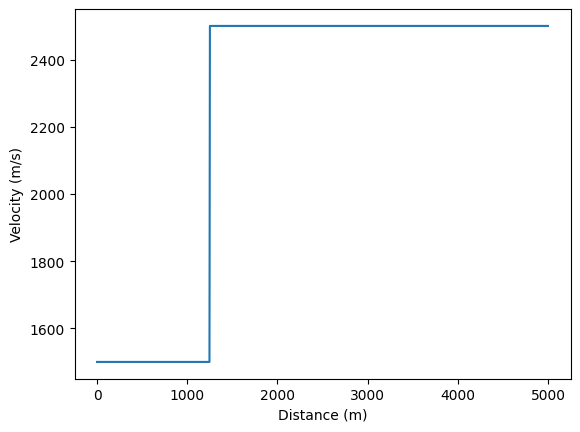

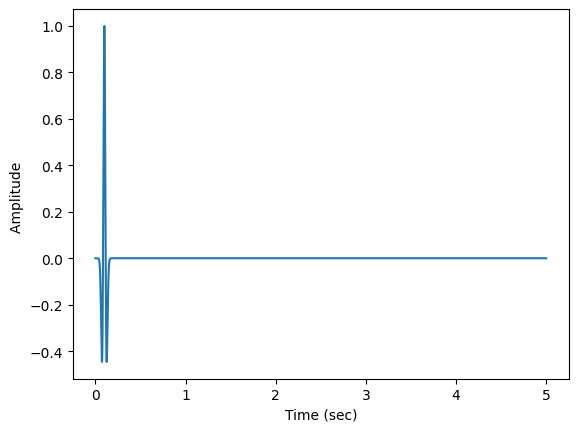

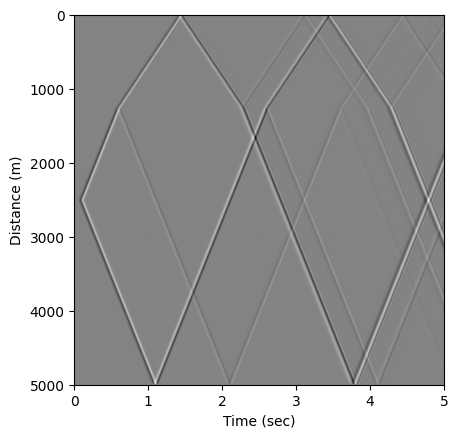

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

class Chyperbolic1D:
    """Solve 1D hyperbolic equation"""

    def __init__(self, iM=5000, iN=1000, fDeltaX=5.0, fDeltaTime=0.001, fv0=1500.0, fv1=2500.0):
        self.iM = iM # Number of cells in time
        self.iN = iN # Number of cells spatially
        self.fDeltaX = fDeltaX
        self.fDeltaTime = fDeltaTime
        self.fv0 = fv0
        self.fv1 = fv1
        self.afc = np.zeros(iN)
        self.afc[0:int(iN/4)] = fv0
        self.afc[int(iN/4):iN] = fv1
        self.afx = np.linspace(0, iN*fDeltaX, num=iN)
        self.aft = np.linspace(0, iM*fDeltaTime, num=iM)
        self.afr = (fDeltaTime * self.afc) / fDeltaX
        self.iPositionDrivingForce = int(iN/2)
        self.afDrivingForce = self.ricker(15.0, 0.1, iM, fDeltaTime)
        self.aafDisplacement = np.zeros((iN, iM))

    # Ricker wavelet yielding the source
    def ricker(self,fp, tp, iM, fDeltaTime):
        afs = np.zeros(iM)
        for iStep in range(0, iM):
            t = iStep * fDeltaTime
            wp = 2.0 * 3.14159 * fp
            afs[iStep] = (1 - 0.5 * pow(wp, 2) * pow((t - tp), 2)) * exp(-0.25 * pow(wp, 2) * pow(t - tp, 2))
        return afs

    # Plotting the underlying velocities of the medium
    def plotWaveVelocity(self):
        plt.plot(self.afx, self.afc)
        plt.xlabel("Distance (m)")
        plt.ylabel("Velocity (m/s)")
        plt.show()

    # Plotting the source for the driving force
    def plotDrivingForceSource(self):
        plt.plot(self.aft, self.afDrivingForce)
        plt.xlabel("Time (sec)")
        plt.ylabel("Amplitude ")
        plt.show()

    # Numerically solving the hyperbolic equation
    def solveHyperbolic(self):
        for j in range(1, self.iM - 1):
            for i in range(1, self.iN - 1):
                self.aafDisplacement[i, j + 1] = (
                    2 * self.aafDisplacement[i, j]
                    - self.aafDisplacement[i, j - 1]
                    + self.afr[i]**2 * (self.aafDisplacement[i + 1, j] 
                    - 2 * self.aafDisplacement[i, j] + self.aafDisplacement[i - 1, j])
                )
                if i == self.iPositionDrivingForce:
                    self.aafDisplacement[i, j + 1] += self.afDrivingForce[j] * self.fDeltaTime * self.fDeltaTime

    def plotWaveField(self):
        plt.imshow(self.aafDisplacement, cmap='gray', extent=[0, self.iM * self.fDeltaTime, self.iN * self.fDeltaX, 0])
        ar = 1.0
        ax = plt.gca()
        asr = 1.0 / (ax.get_data_ratio() * ar)
        plt.Axes.set_aspect(ax, asr)
        plt.ylabel("Distance (m)")
        plt.xlabel("Time (sec)")
        plt.show()


# Usage
tHyper1D = Chyperbolic1D()
tHyper1D.plotWaveVelocity()
tHyper1D.plotDrivingForceSource()
tHyper1D.solveHyperbolic()
tHyper1D.plotWaveField()


### Stability
The stability condition for this numerical scheme is given by
\begin{eqnarray}
 r = ck/h \le 1
\end{eqnarray}

If $r=1$, the numerical solution is exact. An exact solution to the wave equation is a plane monochromatic wave with frequency $\omega$ and
wavenumber $k_x$, which are constants.
\begin{eqnarray}
u(x,t) = \exp i(k_x x - \omega t)
\end{eqnarray}
As an exercise, prove that this is a solution.

We will now find the stability condition by using the plane wave as a trial solution in the finite-difference solution.

First, to avoid confusion, we replace $i$ and $j$ in the finite-difference solution above with indices $m$ (x) and $n$ (time). We then have the displacement $u$ as:
    
\begin{eqnarray}
u_{m,n} = \exp i(k_x m h - \omega n k)
\end{eqnarray}

If we insert the above expression for $u$ into the finite-difference solution above (changing $i$ to $m$ and $j$ to $n$ one gets:
                                  
\begin{eqnarray}
  \exp(-i\omega k )  = 2 -\exp(i\omega k)   
                    + r^2[\exp(ik_x h)- 2 + \exp(-ik_x h)]
\end{eqnarray}
                                  
This can be rearranged to:
\begin{eqnarray}
\exp(-i\omega k) + \exp(i\omega k) = (2-2r^2) +
                                     r^2[\exp(ik_x m h)] + \exp(-ik_x m h)]
\end{eqnarray}
                                  
Since $2\cos(x) = \exp(ix)+\exp(-ix)$ the relation above can be rewritten to
\begin{eqnarray}
\cos(\omega k) = (1-r^2) + r^2\cos(k_x m h) 
\end{eqnarray}
                
1. For $r=1$ this gives $\omega h = k_x m $ which
   is the so-called dispersion relation for a plane 
   wave, which means that $r=1$ corresponds to the exact solution.
                            
2. For $r < 1$ the finite-difference solution is stable, but not exact.

3. For $r>1$ the finite-difference solution is unstable.
                                  







## Wave equation in two dimensions

The acoustic equations of motion in two dimensions are
\begin{eqnarray}
  \rho(x,z)\ddot{u}_x(x,z,t)  & = & \partial_x \sigma(x,z,t),\\
  \rho(x,z)\ddot{u}_z(x,z,t)   & = & \partial_z\sigma(x,z,t).
                                        \label{eq:ch4-motion}
\end{eqnarray}
and the constitutive equation is
\begin{eqnarray}
  \sigma(x,z,t) & = & \kappa(x,z)\left[\partial_x u_x(x,z,t)+ \partial_z u_z(x,z,t)\right] +s(x,z,t)\nonumber\\
                                              \label{eq:ch4-stress}
\end{eqnarray}

Here:

  - $\ddot{u} = \partial^2_t u$
  - $x,z$ : Horisontal and vertical coordinates
  - $t$ : time
  - $u_x(x,z,t)$ : Horizontal component of displacement
  - $u_z(x,z,t)$ : Vertical component of displacement
  - $\sigma(x,z,t)$ : Stress
  - $\kappa(x,z)$ : Bulk modulus
  - $\rho(x,z)$ : Density
  - $s(x,z,t)$ : Source function

###  Numerical Grid in 2D
  - $\Delta z$,$\Delta x$: Grid interval in horizontal and vertical direction
  - $\Delta t$: Time sampling interval
  - $N_x$, $N_z$: No of gridpoints in horizontal and vertical direction
  - $N_t$: No of time samples
\begin{eqnarray}
    x & = & k\Delta x,  k  = 0, ..., N_x-1,   \nonumber\\
    z & = & l\Delta z,  l  =  0, ..., N_z-1,   \nonumber \\
    t & = & m\Delta z,  m  =  0, ..., N_t-1.   \nonumber \\
                                  \label{eq:ch4-21b}
\end{eqnarray}



\begin{eqnarray}
    \ddot{\sigma}(x,z,t) = \kappa(z) [\partial_x \ddot{u_x}(x,z,t) + \partial_z \ddot{u_z}(x,z,t)] +\ddot{s}(x,z,t).
                                                \label{eq:ch4-500}
\end{eqnarray}

The second-order time derivative on the left-hand side of the constitutive equation for stress is
approximated with

\begin{eqnarray}
\ddot{\sigma}(x,z,t)& \approx &
      \frac{\sigma(x,z,t+\Delta t) -2\sigma(x,z,t) +\sigma(x,z,t-\Delta t)}{(\Delta t)^2}. \nonumber\\
                                                         \label{eq:ch4-501}
\end{eqnarray}


If we insert the above equation  on the left-hand side of the previous equation above and solve
for $\sigma(x,z,t+\Delta t)$, we get


\begin{eqnarray}
    \sigma(x,z,t+\Delta t)           & = &2\sigma(x,z,t) - \sigma(x,z,t-\Delta t) \nonumber\\
                       & + &\Delta t^2\kappa(x,z)[\partial_{x} \ddot{u}_x(x,z,t) + \partial_{z} \ddot{u}_z(x,z,t)] \nonumber\\
                         & + &\Delta t^2 \ddot{s}(x,z,t)\nonumber\\.
                                                       \label{eq:ch4-502}
\end{eqnarray}


The centered first-order derivatives are:

\begin{eqnarray}
d^+_x \sigma(x+\Delta x/2,z,t) = \frac{\sigma(x+\Delta x,z,t)-\sigma(x,z,t)}{\Delta x}\nonumber\\
d^+_z \sigma(x,z+\Delta z/2,t) = \frac{\sigma(x,z+\Delta x,t)-\sigma(x,z,t)}{\Delta z}\nonumber\\
\end{eqnarray}
\begin{eqnarray}
d^-_x \sigma(x-\Delta x/2,z,t) = \frac{\sigma(x,z,t)-\sigma(x-\Delta x,z,t)}{\Delta x}\nonumber\\
d^-_z \sigma(x,z-\Delta z/2,t) = \frac{\sigma(x,z,t)-\sigma(x,z-\Delta z,t)}{\Delta z}\nonumber\\
\end{eqnarray}

Using centered derivatives in the above equation for $\ddot{u}_x$ and $\ddot{u}_z$ we get

\begin{eqnarray}
 \ddot{u}_x(x+\Delta x/2,z,t) & = & \rho^{-1}(x+\Delta x/2,z) d^+_x \sigma(x,z,t) \nonumber\\
                           & = & \rho^{-1}(x+\Delta x/2,z)\left[\frac{ \sigma(x+\Delta x,z) - \sigma(x,z)}{\Delta x}\right]
                                      \label{eq:ch4-504}                           \nonumber\\
 \ddot{u}_z(x,z+\Delta z/2,t) & = & \rho^{-1}(x,z+\Delta z/2)d^+_z \sigma(x,z,t) \nonumber\\
                             & = & \rho^{-1}(x,z+\Delta z/2)\left[\frac{ \sigma(x,z+\Delta z) - \sigma(x,z)}{\Delta z}\right] \nonumber
                                      \label{eq:ch4-505}
\end{eqnarray}

$\ddot{u}_x$ and $\ddot{u}_z$ are now evaluated at $(x+\Delta x/2,z)$ and $(x,z+\Delta z/2)$ and not at $(x,z)$,
so that the  equation for the stress becomes:

\begin{eqnarray}
    \sigma(x,z,t+\Delta t) = 2\sigma(x,z,t) - \sigma(x,z,t-\Delta t) \nonumber\\
                        + \Delta t^2{\kappa(x,z)}[\partial_{x} \ddot{u}_x(x+\Delta x/2,z,t)+ \partial_{z} \ddot{u}(x,z+\Delta z/2,t)]\nonumber\\
                         + \Delta t^2 \ddot{s}(z,t).\nonumber\\
                                                       \label{eq:ch4-506}
\end{eqnarray}

Using numerical approximations $d^-_x$ and $d^-_z$:
\begin{eqnarray}
    \sigma(x,z,t+\Delta t)            = 2\sigma(x,z,t) - \sigma(x,z,t-\Delta t) \nonumber\\
                        + (\Delta t)^2{\kappa(x,z)}[d^-_{x} \ddot{u}_x(x+\Delta x/2,z,t)+
                                                                  d^-_z \ddot{u}_z(x,z+\Delta z/2,t)]\nonumber\\
                         + \Delta t^2 \ddot{s}(x,z,t)\nonumber\\.
                                                       \label{eq:ch4-507}
\end{eqnarray}


  - Source is fixed at one position $\mathbf{x}=(x_s,z_s)$
  - Source time dependence is the Ricker pulse.
  - The boundary conditions for the stress : $\sigma(x,z,t)=0$
       for $t\le0$.
   - $\sigma(x,z=0,t)=0$ and $\sigma[x=(N_x-1)\Delta x,z=(N_z-1)\Delta z,t]=0$.


### Algorithm

 1. Set $t=0$, $\sigma(x,z,t=0)=0$ and $\sigma(x,z,t=-\Delta t)=0$
    for all $z=l\Delta z$, $l=0,\ldots,N_z-1$
    and $x=m\Delta x$ $m=0,\ldots,N_x-1$.
    

 2. Compute the accelerations $\ddot{u}_x(z,t)$ and $\ddot{u}_z(z,t)$ at time $t$,
    and for all $x=m\Delta x$, $m=0,\ldots,N_x-2$ and $z=k\Delta z$,
    $l=0,\ldots,N_z-2$ by using the equations
    
      \begin{eqnarray}
         \ddot{u}_x(x+\Delta x/2,x,t) & = & \rho^{-1}(x+\Delta x/2,z)d^+_x \sigma(x,z,t),\nonumber\\
         \ddot{u}_z(x,z+\Delta z/2,t)   & = & \rho^{-1}(x,z+\Delta z/2)d^+_z \sigma(x,z,t).
         \label{eq:ch4-508}
      \end{eqnarray}
      
      
 3. Compute the stress $\sigma{(x,z,t+\Delta t)}$ at the future time $t+\Delta t$ and
    for all $x=m\Delta x$, $m=1,\ldots,N_x-1$
    and $z=l\Delta z$, $l=1,\ldots,N_z-1$
    by using the equation
    
     \begin{eqnarray}
       \sigma(x,z,t+\Delta t) & = &2\sigma(x,z,t) - \sigma(x,z,t-\Delta t) \\
                & + &\Delta t^2\kappa(x,z) [d^-_{x} [\ddot{u}_x(x+\Delta z/2,z,t)+\ddot{u}_z(x,z+\Delta z/2,z,t)]
                                                       \label{eq:ch4-509}
      \end{eqnarray}
      

 4. Add the source term for a single grid position $x_s=m_s\Delta x$ and $z_s=l_s\Delta z)$
    \begin{eqnarray}
      \sigma(x_s,z_s,t+\Delta t)= \sigma(x_s,z_s,t+\Delta t)+
       + \Delta t^2 \ddot{s}(x_s,z_s,t).
                                                       \label{eq:ch4-510}
    \end{eqnarray}
    

 5. set $t=t+\Delta t$ and go to 2. Stop if $t=(N_t-1)\Delta t$ is reached.

### Stability
To obtain a numerically stable solution, the following condition must be
approximately fulfilled

\begin{eqnarray}
  \frac{c_0\Delta t}{\Delta z} \leq \frac{1}{\sqrt{2}}.
                  \label{eq:ch4-37}
\end{eqnarray}

This is the stability condition, and it places restrictions on the choice of time sampling interval, spatial sampling interval, and velocity.
\begin{eqnarray}
 \lambda > \Delta z/2
\end{eqnarray}
where the wavelength $\lambda$ is given by
\begin{eqnarray}
 \lambda = c_0/f.
 \label{eq:ch4-37c}
\end{eqnarray}


`` `   




In [3]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as pl
from matplotlib.pyplot import draw, ion
import matplotlib.animation as anim
from math import *
from IPython.display import HTML
from IPython.display import display, Image


class wave2d :
  
  #Source pulse
  def ricker(self,fp,tp,M,dt) :
    s=np.zeros((M))
    for k in range(0,M):
      t=k*dt
      wp=2.0*3.14159*fp
      s[k] =(1-0.5*pow(wp,2)*pow((t-tp),2))*exp(-0.25*pow(wp,2)*pow(t-tp,2))
    return(s)


  def __init__(self) :
    self.dx = 5.0   # Case 1 Grid spacing
    self.dt = 0.0005 # (seconds)
    self.Tmax = 0.4
    self.Nt = 500
    self.Nx = 200 # Number of gridpoints in x-direction
    self.Ny = 200 # Number of gridpoints in y-direction
    self.Ns=100
    self.t = 0 

    #Source parameter
    self.f0=20.0 #Dominant frequency (Hz)
    self.t0=0.05  #Time delay
    self.src= self.ricker(self.f0,self.t0,self.Nt,self.dt)
    
    #Source position
    self.ixs = int(self.Nx/2)
    self.iys = int(self.Ny/2)
    self.kappa  = np.zeros((self.Nx,self.Ny))
    self.rho    = np.zeros((self.Nx,self.Ny))
    
    #Animation parameters
    self.cnt=0
    self.inc=1
    self.animrun=True
    self.im=0

    #Simple model
    self.kappa[:,:] = 6.25e+09
    #self.kappa[:,int(self.Nx/2-1):self.Nx] = 7.0e+09
    #self.kappa[int(self.Nx/2-1):self.Nx,:] = 7.0e+09
    self.rho[:,:]    = 1000.0

    self.P0 = np.zeros((self.Nx,self.Ny))  #Past pressure
    self.P1 = np.zeros((self.Nx,self.Ny))  #Present pressure
    self.P2 = np.zeros((self.Nx,self.Ny))  #Future pressure
    self.ax= np.zeros((self.Nx,self.Ny))  #Future pressure
    self.ay = np.zeros((self.Nx,self.Ny))  #Future pressure

  #Forward derivative in x-direction
  def dxplus(self,A,dx) :
    nx = A.shape[0]
    ny = A.shape[1]
    dA = np.zeros((nx,ny))
    for j in range(0,ny) :
      for i in range(0,nx-1) :
        dA[i,j] = (A[i+1,j]-A[i,j])/dx
    return dA

  #Backward derivative in x-direction
  def dxminus(self,A,dx) :
    nx = A.shape[0]
    ny = A.shape[1]
    dA = np.zeros((nx,ny))
    for j in range(0,ny) :
      for i in range(1,nx) :
        dA[i,j] = (A[i,j]-A[i-1,j])/dx
    return dA

  #Forward derivative in y-direction
  def dyplus(self,A,dx) :
    nx = A.shape[0]
    ny = A.shape[1]
    dA = np.zeros((nx,ny))
    for i in range(0,nx) :
      for j in range(0,ny-1) :
        dA[i,j] = (A[i,j+1]-A[i,j])/dx
    return dA

#Backward derivative in y-direction
  def dyminus(self,A,dx) :
    nx = A.shape[0]
    ny = A.shape[1]
    dA = np.zeros((nx,ny))
    for i in range(0,nx) :
      for j in range(1,ny) :
        dA[i,j] = (A[i,j]-A[i,j-1])/dx
    return dA

#Compute one timestep
  def tstep(self,t):
    #print("Timestep: ", k)
    #Compute accelerations
    self.ax = self.dxplus(self.P1,self.dx)
    self.ax = (1.0/self.rho)*self.ax
    self.ay = self.dyplus(self.P1,self.dx)
    self.ay = (1.0/self.rho)*self.ay

    self.ax = self.dxminus(self.ax,self.dx)
    self.ay = self.dyminus(self.ay,self.dx)

    self.P2 = 2*self.P1 - self.P0 + (self.dt*self.dt)*self.kappa*(self.ax+self.ay)
    self.P2[self.ixs,self.iys] = self.P2[self.ixs,self.iys] + (self.dt*self.dt)*self.src[t]/(self.dx*self.dx)

    self.P0=self.P1
    self.P1=self.P2
    return self.P2

  def updatefig(self,*args):
    ''' Callback function for updating each frame

    Arguments:
        *args: provided by callback

    Returns
        None
    '''
    
    im=self.im
    img = self.tstep(self.t) #Get the next frame
    im.set_array(img)        #Plot the frame 
    self.t =  self.t+1
    return(im,)


  def movie(self):
    #Plot frame no 0
    fig = pl.figure()
    img = self.tstep(0)
    self.t=1
    o1=0
    o2=0
    d1=self.dx
    d2=d1
    n1=self.Nx
    n2=self.Ny
    cmin=-1.0e-08
    cmax= 1.0e-08
    colormap="gray"
    self.im=pl.imshow(img,interpolation='nearest',clim=(cmin,cmax),
                 cmap=colormap,extent=[o1,o1+d1*n1,o2+d2*n2,o2],animated=True)
    #self.im=pl.imshow(img,interpolation='nearest',
     #       cmap=colormap,extent=[o1,o1+d1*n1,o2+d2*n2,o2],animated=True)
    ax=pl.gca()
    ar=1.0
    asr = 1.0/(ax.get_data_ratio()*ar)
    pl.Axes.set_aspect(ax,asr)
    #Animation loop
    ani = anim.FuncAnimation(fig, self.updatefig, frames=self.Nt-2, repeat=True, interval=100, blit=True)
    #pl.close(ani.fig)
    display(HTML(ani.to_html5_video()))
    
   
#Test the wave2d class
wave = wave2d()
wave.movie()

<IPython.core.display.Javascript object>

[Previous note](parabolicEquations.ipynb) -- [Next note](optimization.ipynb)